155


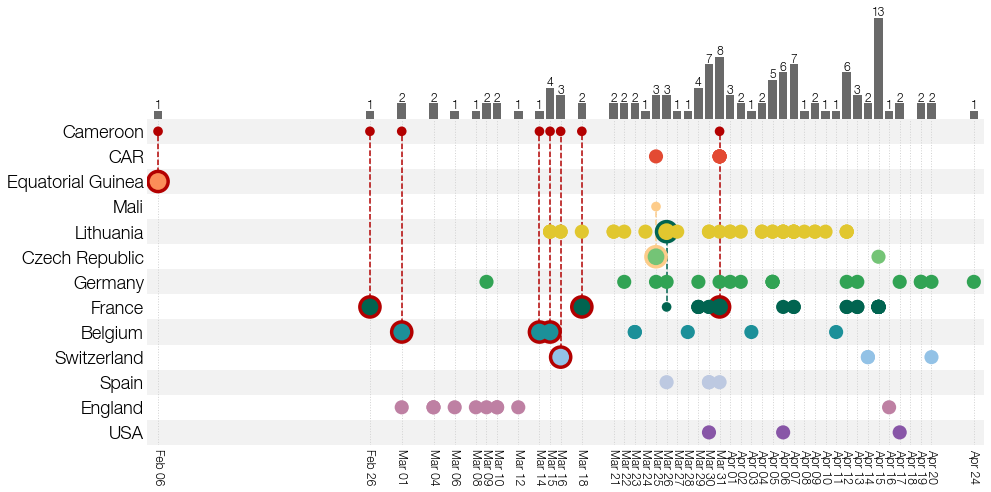

In [1]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.collections import LineCollection
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42

import os,glob
import numpy as np
from Bio import SeqIO
from collections import Counter

import baltic as bt


import numpy as np

colours={}
for line in open('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/colours.csv','r'):
    loc,colour=line.strip('\n').split('\t')
    colours[loc]=colour

#####
## Code originally written by Ingrida Olendraite, modified by Gytis Dudas
#####

filename='/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/travel_qc_info.csv'

##############################################################
##############################################################
### date country travelcountry(can be nothing)
f1mem=[]
seq_counter=0
all_countries_forcolour=[]
with open(filename,'r') as f1:
    # skip headers
    next(f1)
    for line in f1:
        seq_counter+=1
        nline = line.strip().split('\t')
        date  = nline[2]
        country_found = nline[0].split('/')[1].replace('_',' ')
        
        travel_country = 'none'
        try: 
            travel_country = nline[4]
            all_countries_forcolour.append(travel_country)
        except IndexError:
            # a bit different so i can see it gets here
            travel_country='None'
        #print (date, country_found, travel_country)
        f1mem.append([date, country_found, travel_country])
        all_countries_forcolour.append(country_found)

all_y_countries = []
all_x_dates     = []

for line in f1mem:
    all_y_countries.append(line[1])
    all_x_dates.append(line[0])
unique_countries = sorted(np.unique(all_y_countries))
unique_dates     = np.unique(all_x_dates)
##############################################################
##############################################################



#############################
#############################
### x ticks / positions etc

decimals_represented = []
for u in unique_dates:
    if len(u)==10:
        decimals_represented.append(bt.decimalDate(u))
mindecimal = min(decimals_represented)
maxdecimal = max(decimals_represented)
decimal_day_step = 0.002739726027357392

xpositions = []
xlabels    = []
date_decimal_xpos = {}
for u in unique_dates:
    if len(u)==10:
        decimal_date_value = bt.decimalDate(u)
        xpos = (decimal_date_value-mindecimal)/decimal_day_step
        #print (u, decimal_date_value, xpos)
        xpositions.append(xpos)
        xlabels.append(bt.convertDate(u,'%Y-%m-%d','%b %d'))
        date_decimal_xpos[decimal_date_value] = xpos

#############################
#############################


##########################################
##########################################
### PLOTTING 



fig = plt.subplots(figsize=(15,8),facecolor='w')

gs = GridSpec(2,1,hspace=0.00,wspace=0.0,height_ratios=[1,3])
ax=plt.subplot(gs[1])

basic_fontsize = 14


### SCATTER
ypos_counter = 0
ypositions   = []
ylabels      = []

xpos_count={}


ylabels=['USA', 'England', 'Spain', 'Switzerland', 'Belgium', 'France', 'Germany', 'Czech Republic', 'Lithuania', 'Mali', 'Equatorial Guinea', 'CAR', 'Cameroon']
    
for c,country in enumerate(ylabels):
    for f in f1mem:
        if country == f[1]:
            x = (date_decimal_xpos[bt.decimalDate(f[0])])
            try:
                xpos_count[x]+=1
            except KeyError:
                xpos_count[x] = 1
#             cc = (country_color[c])
            country=country.replace('_',' ')
            fc=colours[country]
            ec='none'
            ## DEFAUL PARAMETERS
            s   = 200
            #####################

            ## TRAVEL STATUS
            travelinfo = f[2]
            if travelinfo == 'None':
                travelinfo = ''
            
            if travelinfo !='':
                ec = colours[f[2]]
                s+=80
                
                ax.scatter(x,ylabels.index(f[2]),s=s/3,facecolor=ec,edgecolor='none', zorder=5)
                ax.plot([x,x,],[c,ylabels.index(f[2])],color=ec,ls='--',zorder=2)
                
            ax.scatter(x,c,s=s,facecolor=fc,edgecolor='none', zorder=5)
            ax.scatter(x,c,s=s*2,facecolor=ec,edgecolor='none', zorder=4)


ax.set_xticks(xpositions)
ax.set_yticks(range(len(ylabels)))
ax.set_xticklabels(xlabels, rotation=270, fontsize=basic_fontsize-2)
ax.set_yticklabels(ylabels, fontsize=basic_fontsize+4)
ax.tick_params(size=0)
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in []]

[ax.axhspan(y-0.5,y+0.5,facecolor='k',edgecolor='none',zorder=0,alpha=0.05) for y in range(len(ylabels)) if y%2==0]

ax.grid(axis='x', which='major', linestyle=':', color='lightgrey', linewidth=1, zorder=0)

ax.set_xlim(min(xpositions)-1,max(xpositions)+1)
ax.set_ylim(-0.5,len(ylabels)-0.5)



ax2=plt.subplot(gs[0])

### BARS | TOTAL
bottom = len(ylabels)+1

# bottoms        = []
heights        = []
bar_xpositions = []
maxbar = 0
for x in xpos_count:
#     bottoms.append(bottom)
    heights.append(xpos_count[x])
    bar_xpositions.append(x)
    
    if xpos_count[x]>maxbar:
        maxbar = xpos_count[x]
    # adding total number at the top of a bar
    ax2.text(x=x, y=xpos_count[x], s=xpos_count[x], ha='center', va='bottom', fontsize=basic_fontsize-2)
    
ax2.bar(bar_xpositions, height=heights, color='dimgrey', zorder=5)

[ax2.spines[loc].set_visible(False) for loc in ax.spines]

ax2.set_xlim(ax.get_xlim())
ax2.set_ylim(0,14)
ax2.set_xticks([])
ax2.set_xticklabels([])
ax2.set_yticks([])
ax2.set_yticklabels([])

print(seq_counter)
plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/figures/Fig2_travels_breakdown.png',dpi=100,bbox_inches='tight')
plt.show()

In [2]:
# print(f1mem)
for f in f1mem:
    if f[-1]!='None' and f[-1]!='':
        print(f)

['2021-03-01', 'Belgium', 'Cameroon']
['2021-03-16', 'Switzerland', 'Cameroon']
['2021-03-14', 'Belgium', 'Cameroon']
['2021-02-26', 'France', 'Cameroon']
['2021-03-18', 'France', 'Cameroon']
['2021-03-15', 'Belgium', 'Cameroon']
['2021-03-26', 'Lithuania', 'France']
['2021-03-31', 'France', 'Cameroon']
['2021-02-06', 'Equatorial Guinea', 'Cameroon']
['2021-03-25', 'Czech Republic', 'Mali']
